# Lab Assignment One: Exploring Table Data 

## CS 7324 Fall 2023
## Catherine Magee, Morgan Mote, Luv Patel

-------------------------------------------------------------------------------

-------------------------------------------------------------------------------
# Instructions and Rubric

### You are to perform preprocessing and exploratory analysis of a data set: exploring the statistical summaries of the features, visualizing the attributes, and addressing data quality. This report is worth 10% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a rendered Jupyter notebook. Any visualizations that cannot be embedded in the notebook, please provide screenshots of the output.

- You should analyze table data. The requirements and rubric for each are explained below.

- A note on grading: This lab is mostly about visualizing and understanding your dataset. The largest share of the points is from how you interpret the visuals that you make. Making the visuals is not enough to satisfy each of the rubrics below—you should appropriately explain what the implications of the visualizations are. In other words, expect about 20% of the available points for visuals that have no substantive discussion. Graded Example from previous offering: https://www.dropbox.com/sh/yinn3v3qnzlbep5/AAA-i1u-4ylyxwiCb8nyEDY7a?dl=0Links to an external site. 

## Table Data 

### Dataset requirements: Choose a dataset that is mostly ready to be analyzed. That is, it is already in the format of table data. The following requirements should be met:

1.	The data includes categorical features (it can also include other forms of data, but must have categorical data)
2.	The data must be 1,000 rows or larger
3.	The data is not strictly image or text data (but could have these data)
4.	The dataset should have some prediction task associated with it (i.e., labels to learn, classification)

## Table Data Grading Rubric

### Business Understanding (1.5 points total).  
- [1.5 points] In your own words, give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why and how was this data collected in the first place?). What is the prediction task for your data and why are other third parties interested in the result? Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to these third parties?
- Be specific and use your own words to describe the aspects of the data.
### Data Understanding (3 points total)
- [1.5 points] Load the dataset and appropriately define data types. What data type should be used to represent each data attribute? Discuss the attributes collected in the dataset. For datasets with a large number of attributes, only discuss a subset of relevant attributes.  
- [1.5 points] Verify data quality: Explain any missing values or duplicate data. Visualize entries that are missing/complete for different attributes. Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation).  
### Data Visualization (4.5 points total)
- [2 points] Visualize basic feature distributions. That is, plot the dynamic range and exploratory distribution plots (like boxplots, histograms, kernel density estimation) to better understand the data. Describe anything meaningful or potentially useful you discover from these visualizations. These may also help to understand what data is missing or needs imputation. Note: You can also use data from other sources to bolster visualizations. Visualize at least five plots, at least one categorical. 
- [2.5 points] Ask three interesting questions that are relevant to your dataset and explore visuals that help answer these questions. Use whichever visualization method is appropriate for your data.  Important: Interpret the implications for each visualization. 
### Exceptional Work (1 points total)
- You have free reign to provide any additional analyses. 
- One idea (required for 7000 level students): implement dimensionality reduction using uniform manifold approximation and projection (UMAP), then visualize and interpret the results. Give an explanation of UMAP dimensionality reduction methods.
-------------------------------------------------------------------------------

-------------------------------------------------------------------------------
# Business Understanding

- We retrieved out dataset from the following source: https://console.cloud.google.com/marketplace/details/usafacts-public-data/covid19-us-cases?filter=solution-type:dataset&filter=category:covid19&id=3eaff9c5-fbaf-47bb-a441-89db1e1395ab&project=still-nebula-398202

This exploratory analysis focuses on COVID 19 data pulled from the Google Cloud Public Datasets Program. More Specifically, this dataset focuses on a census report in Texas that was collected during the pandemic in 2021. The purpose of this dataset is to discover which counties in Texas are at highest risk for positive COVID 19 cases.

This analysis is essential to flattening the curve or slowing the spread of postive COVID 19 cases because it surfaces not only the counties that are at the highest risk but also which demographic in that county needs the most assistance. Therefore this analysis can provide useful information to third parties such as hospitals in their distribution of personal protective equipment (PPE) such as masks.

The COVID-19 pandemic had a major impact on every facet of the human experience for people all over the world.  Businesses closed while people lost their jobs, homes, and loved ones.  Through the significant human impact, data collection has allowed  analysts to shed light on exactly how the pandemic affected businesses and economies worldwide. On a regulatory front, there were many inconsistencies in public health regulations and guidelines between federal and state agencies.  These disparities fueled public health concerns and debates which contributed to an increased sense of confusion and lack of effectiveness of the measures put in place to protect the public from COVID-19 infection.  The data was collected to provide an accurate view of the affects of a pandemic in the US so that we may be better prepared to face a pandemic in the future.

Through our analysis, we have revealed that some areas of the country have less deaths overall but higher mortality rates from confirmed COVID-19 cases due to many factors such as local population size and density, proximity to an urban area, and many other aspects will be explored. Some areas with a low population have experienced a higher deaths-per-thousand count than large urban areas with a higher number of deaths but a lower count of deaths-per-thousand. The goal of this analysis is to predict which counties will be at the highest risk with the lowest amount of resources in the future.  Based on these notions and within a certain degree of accuracy, it may be possible to predict the development in a region given comparable data from other regions.

## Data Understanding

#### Loading the Dataset

In [5]:
import pandas as pd

#CSV file is in the same directory as Python script
file_path = "COVID-19_cases_plus_census.csv"

# Read the CSV file into a DataFrame
cases = pd.read_csv(file_path)

# Now, 'cases' contains the data from the CSV file


### Attributes and their data types

 In order to decide the correct types for our features it was important to first divide them into qualitative (categorical) and quantitative (numerical).                                                                                          

The quantitative features are "confirmed_cases", "deaths", "total_pop", "median_income", "median age", "cases_per_1000", "deaths_per_1000", and "death_per_case".  The qualitative features are "county_name" and "state". 
    
Next we decided to divide the values into discrete vs continuous for the quantitative features and nominal vs ordinal for the qualitative features.  In doing this we ensure that we select the best data types for our datasets features. 
    
For the quantitative features in our dataset we decided that "confirmed_cases", "deaths" were discrete counts. Next we decided that "total_pop", "median_income", "median age", "cases_per_1000", "deaths_per_1000", and "death_per_case" are continous to support their float formatting in the original dataset. Lastly, for the qualitative features in our dataset we decided "county_name" and "state" are nominal. 

##### Below you can see a table of the relevant features in the dataset and their explanation. 

|Attribute|Description|
|-------|-----------|
|county_name|Name of each county|
|state|State in the Unites States. |
|confirmed_cases|Total confirmed COVID 19 cases in the county|
|deaths|Total deaths by COVID 19 in the county|
|total_pop|Total population in the county|
|median_income|Middle income value of the county|
|median_age| Middle age value for the county|
|cases_per_1000|Total confirmed cases of COVID-19 in county at time of record (per 1000 people)|
|deaths_per_1000|Total confirmed deaths by COVID-19 in county at time of record (per 1000 people)|
|death_per_case|County specific value of the amount of deaths / confirmed cases |


## Narrowing our dataset 
#### This represents only the relevant attributes with relevant values.

In [6]:
# Filter rows with confirmed_cases > 0
cases = cases[cases['confirmed_cases'] > 0]

# Calculate rates per 1000 people 
# Rate calculation added as new attributes
cases['cases_per_1000'] = (cases['confirmed_cases'] / cases['total_pop']) * 1000
cases['deaths_per_1000'] = (cases['deaths'] / cases['total_pop']) * 1000
cases['death_per_case'] = cases['deaths'] / cases['confirmed_cases']

# Sort the DataFrame by confirmed_cases in descending order
cases = cases.sort_values(by='confirmed_cases', ascending=False)

#### Final dataset selection. 


In [7]:
# Select important attributes
selected_columns = ['county_name', 'state', 'confirmed_cases', 'deaths', 'total_pop', 'median_income', 'median_age', 'cases_per_1000', 'deaths_per_1000', 'death_per_case']
cases = cases[selected_columns]


#### Data types for the selected attributes.

In [8]:
print(cases.dtypes)

county_name         object
state               object
confirmed_cases      int64
deaths               int64
total_pop          float64
median_income      float64
median_age         float64
cases_per_1000     float64
deaths_per_1000    float64
death_per_case     float64
dtype: object


### Final summary of dataframe and list of attributes. 

In [9]:
# Print the column names in the 'cases' DataFrame
print("These are the cases in the dataframe. \n" + str(cases.columns)+ "\n" + "\n")

# Print the first few rows in the resulting DataFrame
print(cases.head())

These are the cases in the dataframe. 
Index(['county_name', 'state', 'confirmed_cases', 'deaths', 'total_pop',
       'median_income', 'median_age', 'cases_per_1000', 'deaths_per_1000',
       'death_per_case'],
      dtype='object')


             county_name state  confirmed_cases  deaths   total_pop  \
287   Los Angeles County    CA          1002614   13936  10105722.0   
832          Cook County    IL           435888    8544   5238541.0   
245      Maricopa County    AZ           425844    6443   4155501.0   
430    Miami-Dade County    FL           347965    4622   2702602.0   
2782       Harris County    TX           286356    3825   4525519.0   

      median_income  median_age  cases_per_1000  deaths_per_1000  \
287         61015.0        36.0       99.212506         1.379021   
832         59426.0        36.4       83.207901         1.630988   
245         58580.0        36.0      102.477174         1.550475   
430         46338.0        39.5      128.751847         1.710204

## Verifying Data Quality 

#### Check for missing values. 

To check for missing values we ran two test. First we performed a generall check by summing all the null values in the selected dataframe by attribute. Which resulted in 0 for each attribute. Thus there were no missing values. For safe keeping we ran a second test to see if any of the columns contained a null value! Which returned an empty listed. Therefore there were no missing values in our dataset. If our dataset did have missing values it would be best to use imputation. By using imputation, we could estimate a counties confirmed cases based on the total population value. If the total population value was the missing data our calculations for death per case, cases per 1000, and deaths per 1000 would be ruined. At this point we would opt for deleting the missing instance to avoid skewing our dataframe. 

In [10]:
missing_values = cases.isnull().sum()
print("Missing Values:")
print(str(missing_values)+ "\n")

print("These are the columns with missing data!" + str(cases.columns[cases.isnull().any()].tolist()))


Missing Values:
county_name        0
state              0
confirmed_cases    0
deaths             0
total_pop          0
median_income      0
median_age         0
cases_per_1000     0
deaths_per_1000    0
death_per_case     0
dtype: int64

These are the columns with missing data![]


### Check for Duplicate Data

Below we use one of python pandas built in functions to check for duplicated data. The dataframe is free of duplicates because the dataframe that was returned is empty.

In [11]:
# python pandas duplicated function
duplicates = cases.duplicated()

# If there is a empty frame then there are no duplicates. 
print(cases[duplicates])

Empty DataFrame
Columns: [county_name, state, confirmed_cases, deaths, total_pop, median_income, median_age, cases_per_1000, deaths_per_1000, death_per_case]
Index: []


#### Simple statistics of our dataframe.

In [12]:
# have the 'cases_sel' DataFrame
summary = cases.describe()

# Print the summary statistics
print(summary)

       confirmed_cases        deaths     total_pop  median_income  \
count     3.139000e+03   3139.000000  3.139000e+03    3139.000000   
mean      7.566138e+03    124.945524  1.022627e+05   49736.142083   
std       2.811232e+04    481.075014  3.284340e+05   13145.573334   
min       1.000000e+00      0.000000  7.400000e+01   19264.000000   
25%       7.985000e+02     12.000000  1.097100e+04   41120.000000   
50%       1.917000e+03     32.000000  2.571400e+04   48038.000000   
75%       4.955500e+03     77.000000  6.752450e+04   55758.000000   
max       1.002614e+06  13936.000000  1.010572e+07  129588.000000   

        median_age  cases_per_1000  deaths_per_1000  death_per_case  
count  3139.000000     3139.000000      3139.000000     3139.000000  
mean     41.148901       76.850959         1.336791        0.017567  
std       5.372906       28.503892         0.922729        0.011150  
min      21.600000        2.461564         0.000000        0.000000  
25%      37.900000       58.

## Visualize Missing Data 

#### The bar chart below gives the viewer an idea of how many missing values there are in each attribute. Each bar represents an attribute in the dataframe. If there is a missing value present in an attribute the bar will dip in height or lower its y axis value. 

In [25]:
!pip install missingno

<AxesSubplot:>

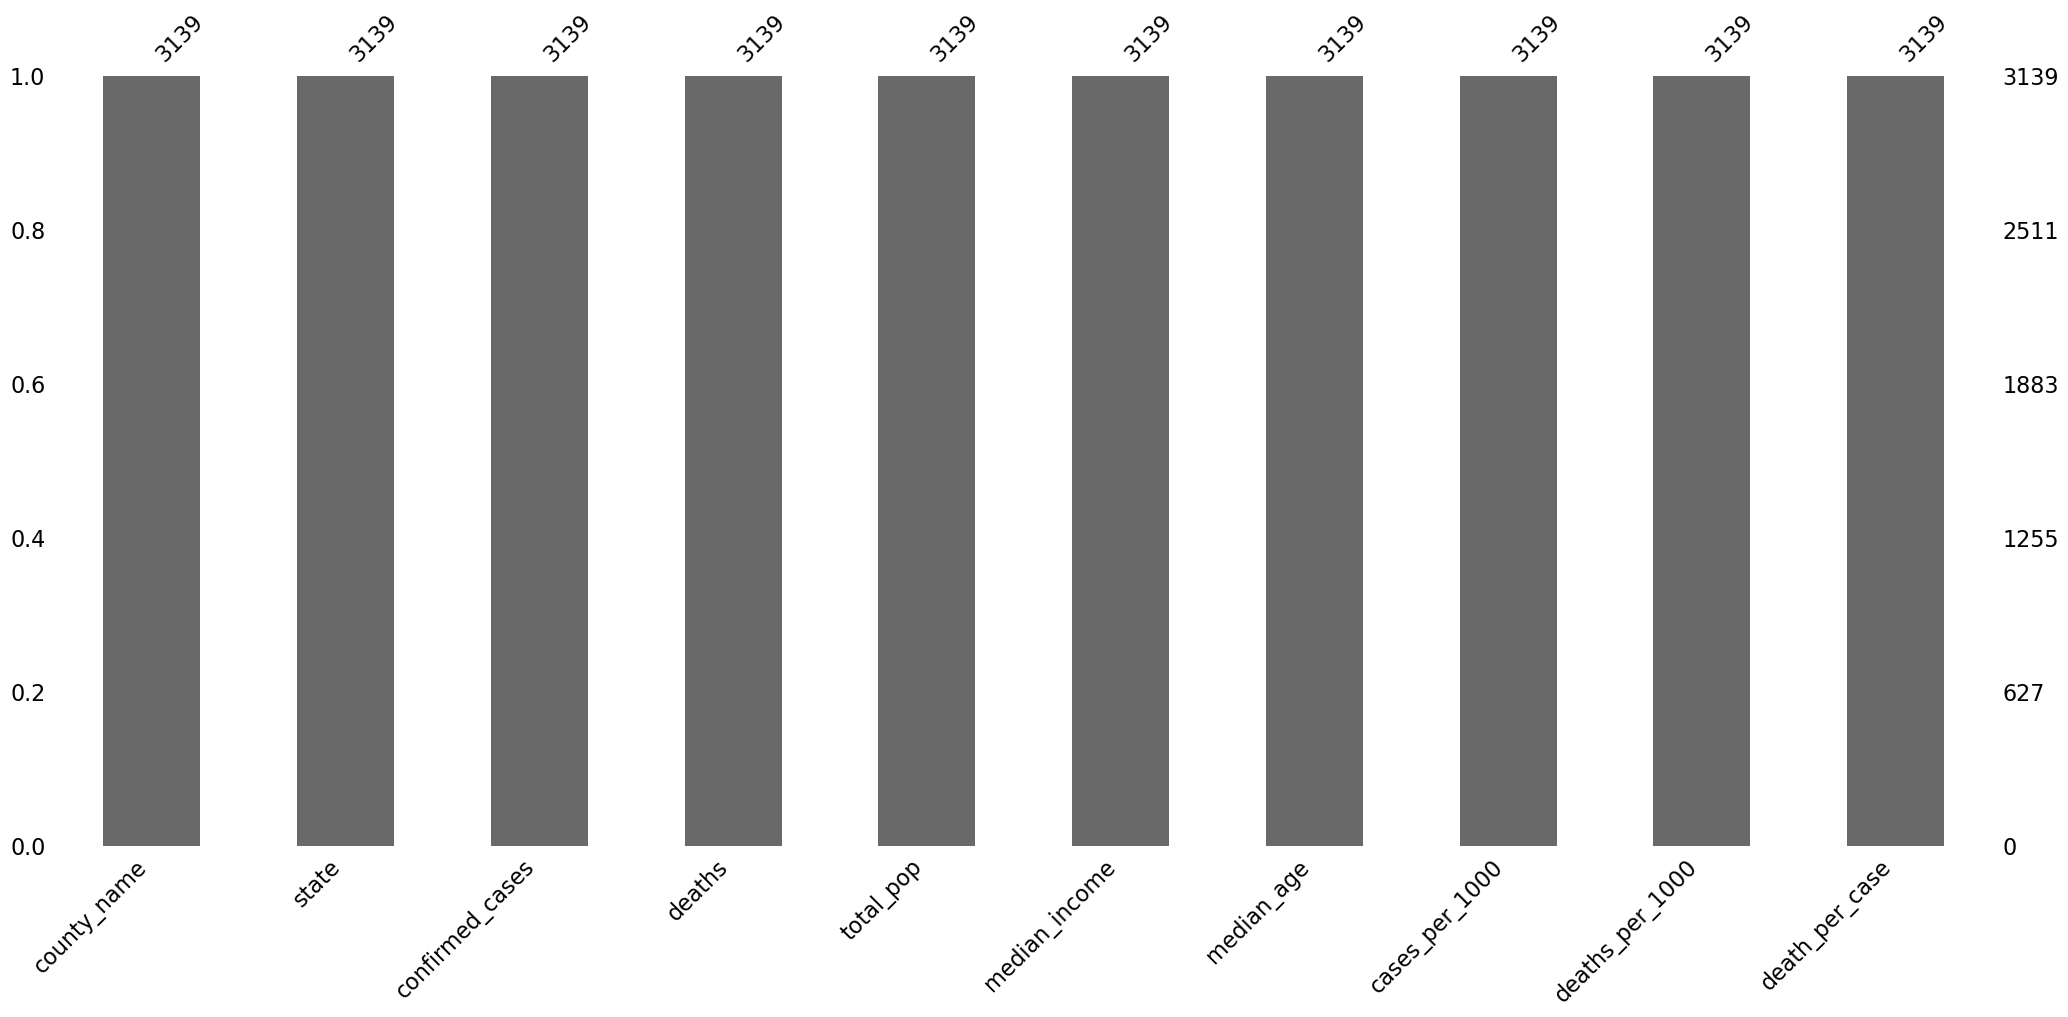

In [26]:
import missingno as msno

msno.bar(cases)

## Visualize the distribution of the dataframe

#### In the following visualization we use distribution plots to further visualize any outliers or skewness of the data. This giving us an overall view of the quality of our data. Below you will see three different ways to visualize the distribution of the dataset. 

This data analysis seeks to answer the following questions:
- How does population income contribute to the economic impact of the COVID-19 pandemic?
- How can the median age of the population help us better understand which demographic groups were impacted the most severely?
- Which communities had the highest mortality rates and what are the factors contributing to these high mortality rates?

## Historgram

This histogram provides an overview of the distribution of the median income in the population of confirmed cases.  This visualization can be used alongside the other visual aids in this project to provide a greater understanding of how the median income of the members of the population contribute to the overall economic impact of the COVID-19 pandemic. Here you can see the frequency distribution of our population being grouped into each median income bin. In this visualization the higher the bin means the more people in our popualtion are grouped into that median income. The implications of the information presented in this visual lies in the importance of income distribution when it comes to policy and decision-making while also taking into account social and economic disparities that may be represented by the data. 

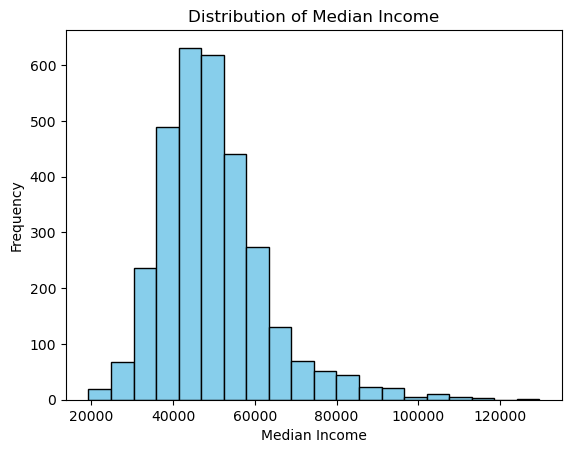

In [14]:
import matplotlib.pyplot as plt

# Visualization for 'median_income' column
plt.hist(cases['median_income'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.title('Distribution of Median Income')
plt.show()

## Box Plot

This box plot provides a representation of the median age of the population of our data set. Here you can see our dataframe has about 4 groups of outliers 2 represent the older population in the state and the other 2 represnt the younger group in the state. The 50th percential of the median age in our dataset is 42 years old while the 25th percential is about 37 and the 75th percential is about 45 years old. This means that 25% of the data is made up of 37 and lower ages while 75% of the data represents ages 45 plus. This proves that most COVID 19 cases are the older population in the state. The central tendency, variability, and presence of outliers can be used to further understand how the median age of people with a confirmed COVID-19 diagnosis contributes to the overall impact of the pandemic.  The implications presented by this visual are rooted in exhibiting demographic insights associated with an age group, which allows governments and organizations to use that information for sufficient planning and resource allocation. For government agencies and health organizations, understanding the age distribution of a population helps with healthcare resource allocation for different age groups in order to provide the best outcomes for patient populations. 

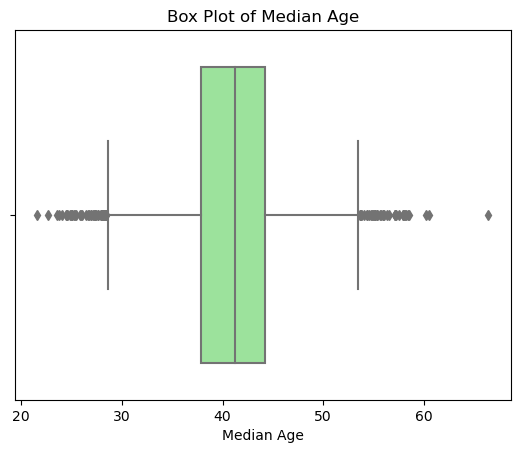

In [15]:
import seaborn as sns

# Visualization for 'median_age' column
sns.boxplot(x=cases['median_age'], color='lightgreen')
plt.xlabel('Median Age')
plt.title('Box Plot of Median Age')
plt.show()

## Bar Chart 

This is a simple bar chart representing the states as categories. This means each state has its own bar below. This graph provides a representation of the states with the greatest number of confirmed COVID-19 cases.The height of the bar represents the count of confirmed COIVD 19 cases in that state. Here you can see some distribution in our data in that not every state has the same count of positive COVID 19 cases. Unfortunately Texas was the highest count of COVID 19 cases. There are many implications to consider when assessing the information presented in the bar chart such as vaccine distribution, public awareness, travel and mobility, public health planning, resource mobilization, risk assessment, and of course economic impact. Geographical comparison with regards to the number of COVID cases per state can help identify regions with higher case numbers so that the severity of the impact is mitigated for the communities within these identified geographical areas. It is important ot note that population density or geographical size  is not taken into consideration for this visualization, only the quantity of cases of each state.

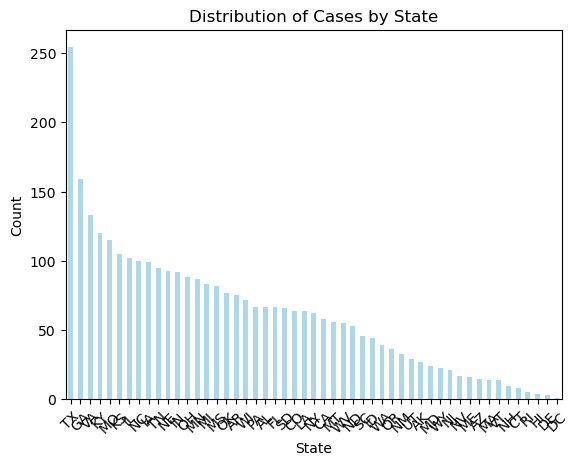

In [16]:
# Visualization for 'state' column (assuming 'state' is categorical)
cases['state'].value_counts().plot(kind='bar', color='lightblue')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Cases by State')
plt.xticks(rotation=45)
plt.show()

# Further Visualizations:

## Kernel Density Plot (KDE)

Kernel density is used to calculate the density of attributes in a neighborhood around the attributes. Further a smaller bandwidth reprents less smoothing and a higer bandwidth represents more smoothing or less peaks in the visualization. For further understanding we have included one visualization with less smoothing than the other.  Also it is important to note that it did not take a high bandwidth to smooth our data. Therefore our dataframe is distributed but not at a rate that we will struggle with dimensionality. 

Text(0.5, 1.0, 'Kernel Density, 0.01 bandwidth, Less smoothing')

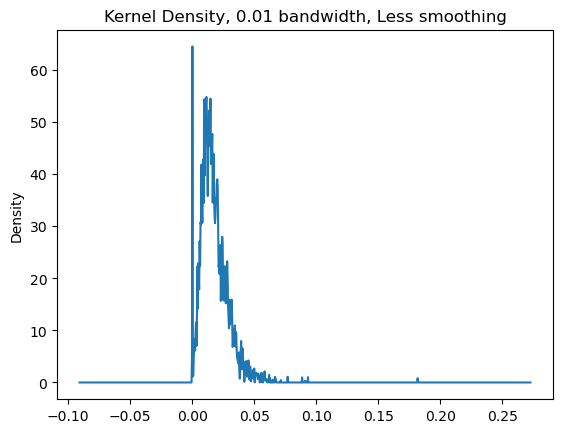

In [17]:
# Visualization for 'death_per_case' attribute
# Different implementation using seaborn both work! Just one example from class and one exmaple from research!
# sns.displot(cases, x="death_per_case", kind="kde")

cases.death_per_case.plot.kde(bw_method=.01)
plt.title('Kernel Density, 0.01 bandwidth, Less smoothing')


Text(0.5, 1.0, 'Kernel Density, 0.2 bandwidth, More smoothing')

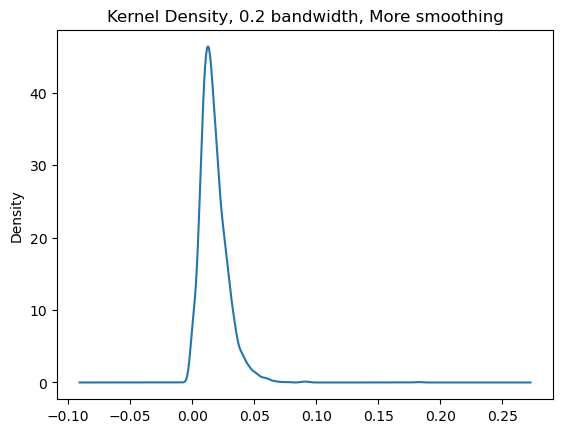

In [18]:
cases.death_per_case.plot.kde(bw_method=.2)
plt.title('Kernel Density, 0.2 bandwidth, More smoothing')

## Correlation Heat Map

This heat map provides a visual representation of the correlation coefficients between the variables in the data set. The table threshold considered for this dataset is any value above 0.2 so that all reasonably notable positive correlations are considered during the analysis. It is important to note the high correlation between confirmed_cases and deaths because this highlights the severity of the impact made by the pandemic and why this data analysis serves as a meaningful contribution to understanding the impact of the pandemic, as well as learning how to best prepare for / respond to a future pandemic. These correlations can be used for risk assessment measures that will allow governments, policy makers, and health organizations understand the best way to reduce the impact of a viral pandemic on a population.

#### Normalization of the dataframe. 

In [19]:
# final selected dataframe
cases_sel = cases[selected_columns]

# Normalize attributes by population
population_columns = ['total_pop','cases_per_1000', 'deaths_per_1000',
       'death_per_case']

cases_sel[population_columns] = cases_sel[population_columns].div(cases_sel['total_pop'], axis=0)

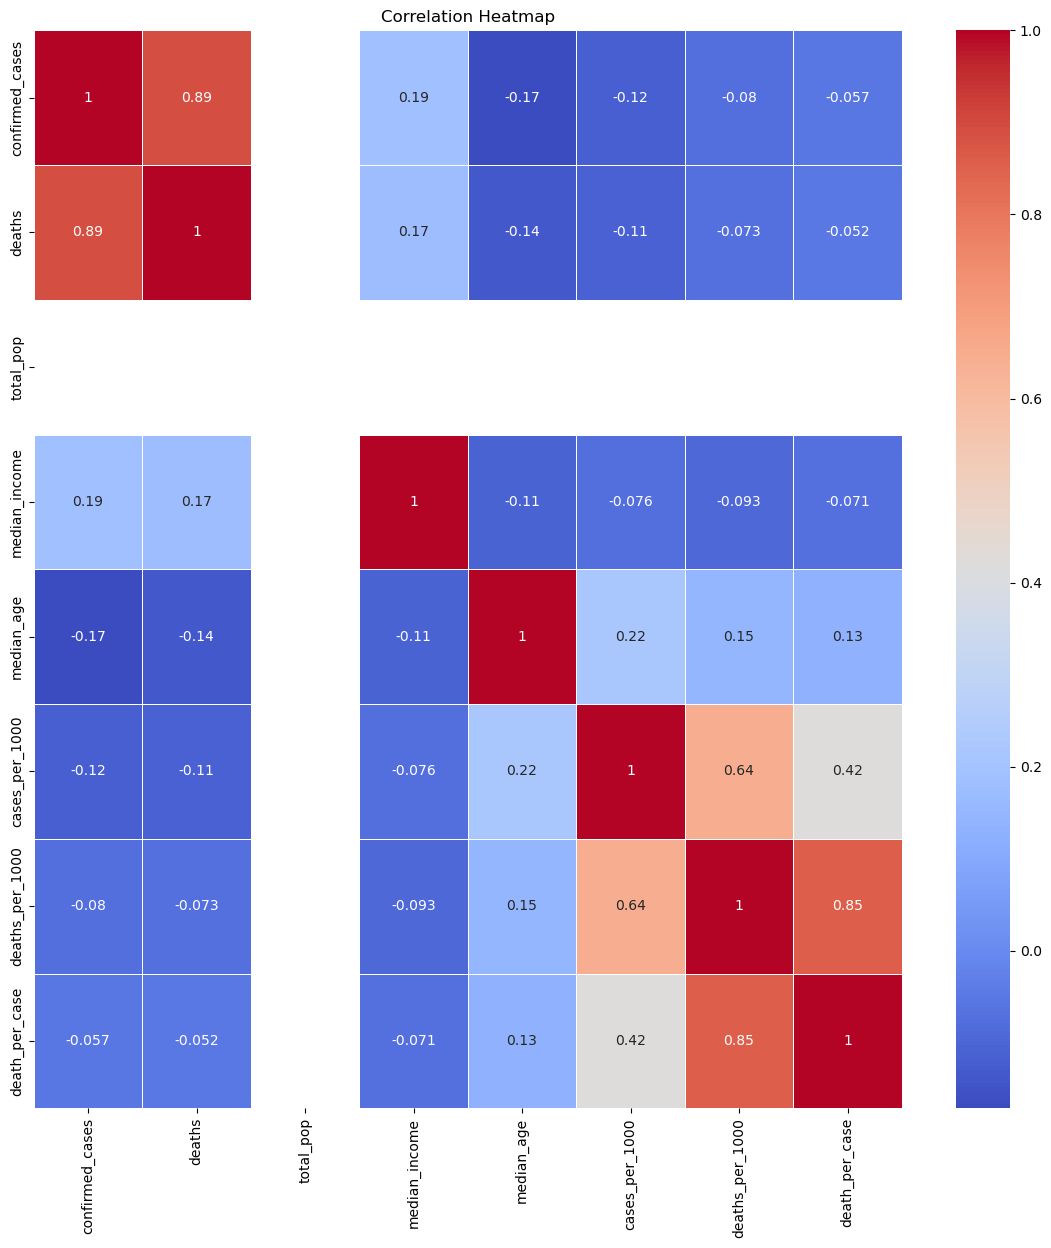

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns and drop rows with missing values
numeric_cols = cases_sel.select_dtypes(include=['number'])
numeric_cols = numeric_cols.dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create a heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Pair Plot

This plot represents the relationships between multiple variables of this dataset. This pair plot is used to visually explore and understand the relationships and distributions among the selected continuous variables in the dataset. It's a helpful tool for identifying potential patterns or correlations between variables and gaining insights into the data's structure.  This multi-variate analysis reveals some information not previously discovered, such as the pattern revealing a relationship between median_age and deaths_per_1000, and median_income and deaths_per_1000.  This visualization is important because it can inform the selection of variables for modeling in making COVID-19 outcome predictions, and these predictions are crucial for data-driven decision-making.

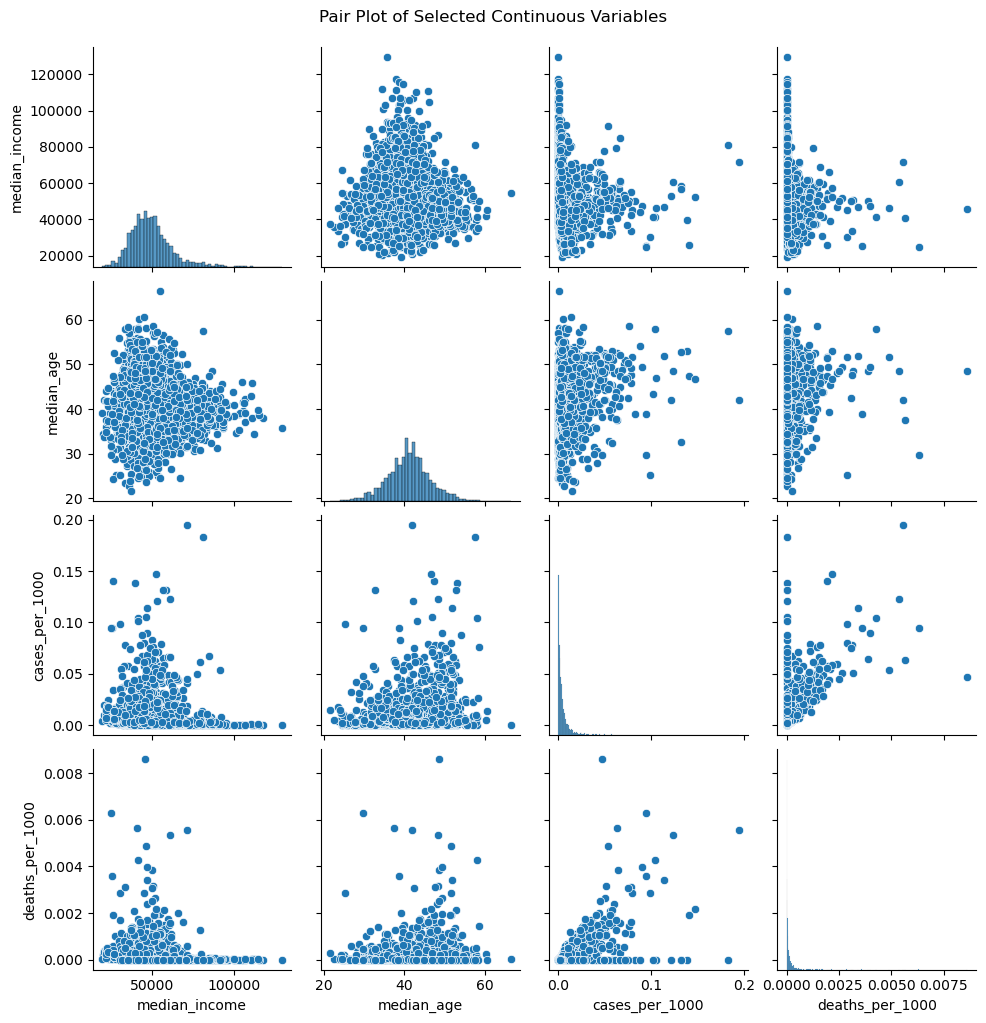

In [21]:
# Visualization using Seaborn's pairplot
sns.pairplot(cases_sel[['median_income', 'median_age', 'cases_per_1000', 'deaths_per_1000']])
plt.suptitle('Pair Plot of Selected Continuous Variables', y=1.02)
plt.show()

## Exceptional Work

- Implement dimensionality reduction using uniform manifold approximation and projection (UMAP), then visualize and interpret the results. 
- Give an explanation of UMAP dimensionality reduction methods. 


In [22]:
!pip install umap-learn

## UMAP Visualization

This visualization utilizes the Uniform Manifold Approximation and Projection algorithm to reduce the dimensionality of the COVID-19 data represents that in a scatter plot.  The result variable contains the UMAP transformation of the following columns: median_income, median_age, cases_per_1000, and deaths_per_1000. The x-axis represents the first dimension of the transformation which is the demographic feature, and the y-axis represents the second dimension of the transformation which is the health feature.  The color bar representing cases per 1000 people allows us to conclude this data analysis with a representation of how our data exhibits feature correlation in a lower dimension.    

In [23]:
import pandas as pd
import umap
import matplotlib.pyplot as plt

# Initialize the UMAP reducer with desired parameters
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean')

# Fit and transform the data to lower dimensions
umap_result = reducer.fit_transform(cases_sel[['median_income', 'median_age', 'cases_per_1000', 'deaths_per_1000']])

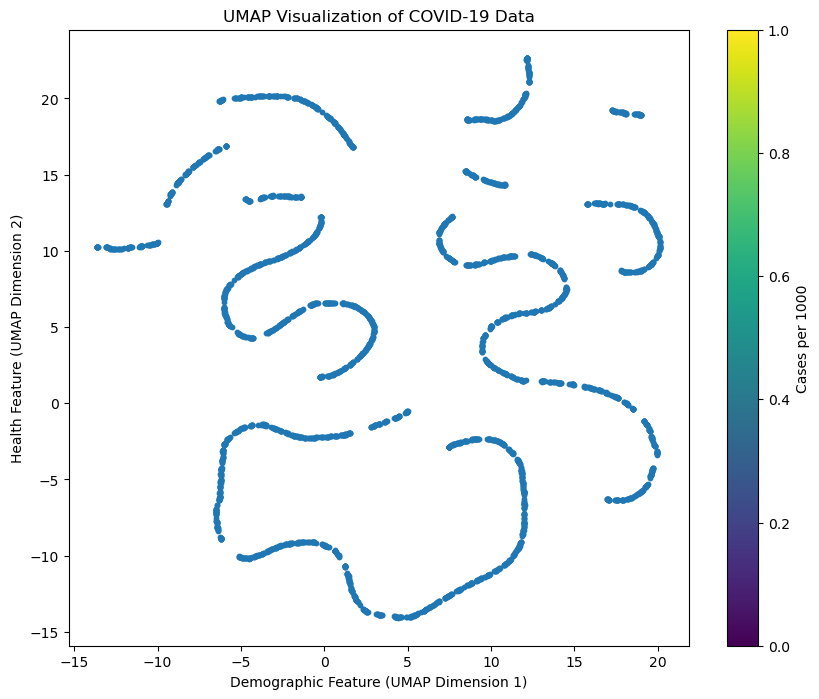

In [28]:
# Create a scatter plot to visualize the data in the reduced UMAP space
plt.figure(figsize=(10, 8))
plt.scatter(umap_result[:, 0], umap_result[:, 1], cmap='viridis', s=10)
plt.title('UMAP Visualization of COVID-19 Data')
plt.xlabel('Demographic Feature (UMAP Dimension 1)')
plt.ylabel('Health Feature (UMAP Dimension 2)')
plt.colorbar(label='Cases per 1000')  # You can label the colorbar as needed
plt.show()